In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from truffletopia import Truffle, UnitOperation

# Truffletopia Unit Operation

Truffletopia makes truffles. A truffle product consists of: a base cake, truffle shell type, primary and secondary flavors, and a color group

In [44]:
truffle = Truffle()
truffle.set_attributes()
truffle.get_params()

base_cake: Chiffon
truffle_type: Candy Outer
primary_flavor: Ginger Ale
secondary_flavor: Papaya
color_group: Slate


Truffles are made by operational units in Truffletopia. The UnitOp or line performance is dictated by the type of truffle it makes.

In [45]:
line = UnitOperation()
line.set_attributes(truffle)
line.get_params()

name: ChiCanGinPapSla
rate: 0.145
std: 0.1316
distribution: <scipy.stats._continuous_distns.gamma_gen object at 0x7f9bb5774d00>


We can randomly generate many products on different production lines.

In [84]:
results = pd.DataFrame()
for i in range(100):
    truffle = Truffle()
    line = UnitOperation()
    truffle.set_attributes()
    line.set_attributes(truffle)
    campaign = truffle.__dict__
    campaign['rate'] = line.run(100)
    results = pd.concat([results, pd.DataFrame(campaign)])
results = results.reset_index(drop=True)

We can inspect the results of the distributions

<Figure size 640x480 with 0 Axes>

/home/wbeckner/anaconda3/envs/decklizer/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wbeckner/anaconda3/envs/decklizer/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


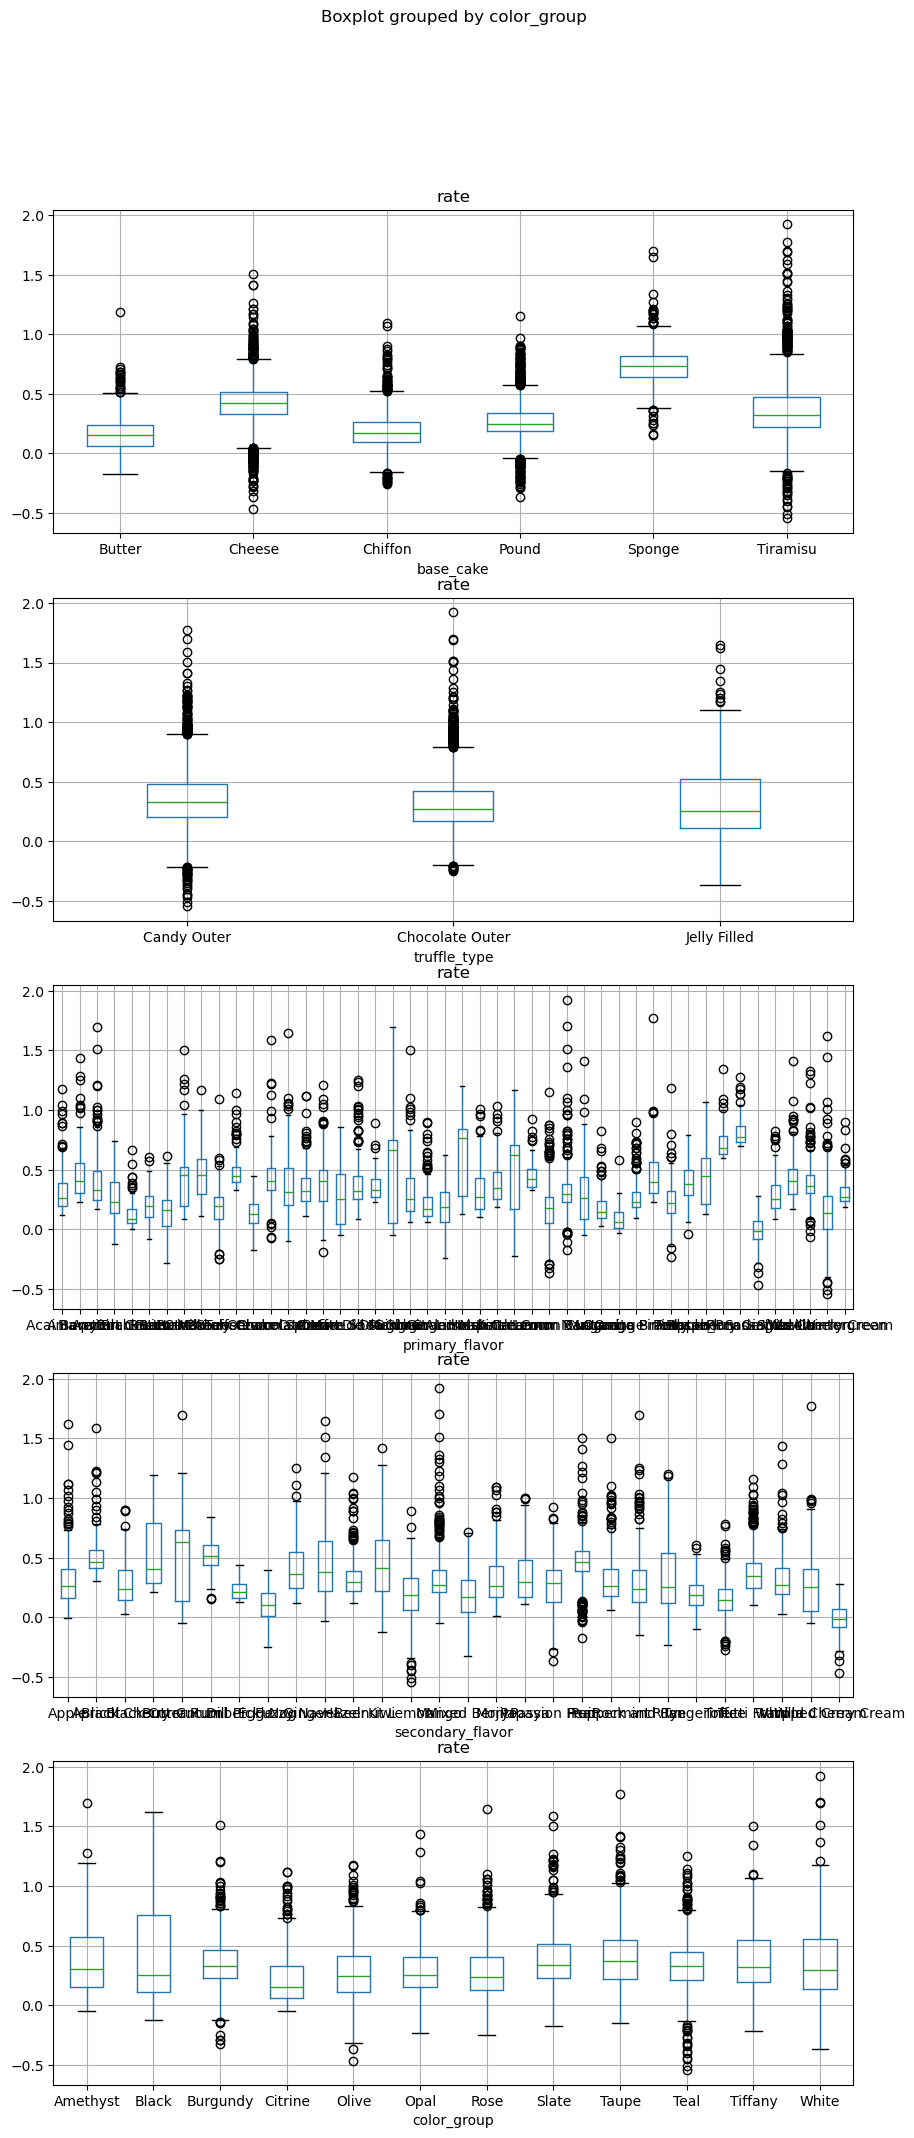

In [9]:
fig, ax = plt.subplots(5,1, figsize=(10,25))
for idx, name in enumerate(results.columns[:-1]):
    results.boxplot('rate', name, ax=ax[idx])
plt.show()
plt.tight_layout()

In [12]:
results.to_csv('truffle_rates.csv', index=False)

# Truffletopia Factory

We can also make rates that are line dependent:

In [48]:
load_data('operations.csv')['Classification'].unique()

array(['Tiramisu', 'Sponge', 'Pound', 'Chiffon', 'Cheese', 'Butter',
       'Chocolate Outer', 'Candy Outer', 'Jelly Filled', 'Doughnut',
       'Chocolate', 'Dill Pickle', 'Butter Milk', 'Amaretto', 'Coconut',
       'Blueberry', 'Chocolate Mint', 'Gingersnap', 'Coffee',
       'Caramel Cream', 'Cheesecake', 'Bavarian Cream', 'Black Licorice',
       'Cherry Cola', 'Vanilla', 'Lemon Custard', 'Sour', 'Mango',
       'Irish Cream', 'Grand Mariner', 'Ginger Ale', 'Fruit Punch',
       'Watermelon', 'Plum', 'Acai Berry', 'Pecan', 'Toasted Coconut',
       'Orange Brandy', 'Wintergreen', 'Creme de Menthe', 'Birch Beer',
       'Apricot', 'Cherry Cream Spice', 'Lemon', 'Butter Toffee', 'Spice',
       'Raspberry Ginger Ale', 'Ginger Lime', 'Butter Pecan', 'Margarita',
       'Kettle Corn', 'Cream Soda', 'Pear', 'Lemon Bar', 'Horchata',
       'Pink Lemonade', 'Orange Pineapple\tP', 'Orange', 'Sassafras',
       'Wild Cherry Cream', 'Egg Nog', 'Rock and Rye', 'Ginger Beer',
       'Black Cu

In [103]:
lines = {
    'Q': {
        'Tiramisu': True,
        'Sponge': True,
        'Pound': True,
        'Chiffon': True,
        'Cheese': True,
        'Butter': True,
        'Chocolate Outer': True,
        'Candy Outer': True,
        'Jelly Filled': True,
        'mu_sigma_bias': [1.1, 0.9],
    },
    'R': {
        'Tiramisu': False,
        'Sponge': False,
        'Pound': False,
        'Chiffon': True,
        'Cheese': True,
        'Butter': True,
        'Chocolate Outer': True,
        'Candy Outer': True,
        'Jelly Filled': True,
        'mu_sigma_bias': [0.9, 1.3],
    },
    'S': {
        'Tiramisu': False,
        'Sponge': True,
        'Pound': False,
        'Chiffon': True,
        'Cheese': True,
        'Butter': True,
        'Chocolate Outer': False,
        'Candy Outer': False,
        'Jelly Filled': True,
        'mu_sigma_bias': [0.6, 1],
    },
    'T': {
        'Tiramisu': False,
        'Sponge': True,
        'Pound': True,
        'Chiffon': True,
        'Cheese': True,
        'Butter': True,
        'Chocolate Outer': False,
        'Candy Outer': False,
        'Jelly Filled': True,
        'mu_sigma_bias': [1, 2],
    }
}
lines = pd.DataFrame(lines)

In [125]:
results = pd.DataFrame()
for i in range(100):
    truffle = Truffle()
    line = UnitOperation()
    truffle.set_attributes()
    line.name = random.choice(lines.columns[lines.loc[truffle.__dict__['base_cake']] & 
                            lines.loc[truffle.__dict__['truffle_type']]])
    line.set_attributes(truffle, line_effect=lines[line.name]['mu_sigma_bias'])
    campaign = truffle.__dict__.copy()
    campaign['line'] = line.name
    campaign['rate'] = line.run(100)
    results = pd.concat([results, pd.DataFrame(campaign)])
results = results.reset_index(drop=True)

In [126]:
results

,base_cake,truffle_type,primary_flavor,secondary_flavor,color_group,line,rate
0,Cheese,Chocolate Outer,Chocolate,Dill Pickle,Amethyst,R,0.171768
1,Cheese,Chocolate Outer,Chocolate,Dill Pickle,Amethyst,R,0.052681
2,Cheese,Chocolate Outer,Chocolate,Dill Pickle,Amethyst,R,0.679122
3,Cheese,Chocolate Outer,Chocolate,Dill Pickle,Amethyst,R,-0.117033
4,Cheese,Chocolate Outer,Chocolate,Dill Pickle,Amethyst,R,0.323692
...,...,...,...,...,...,...,...
9995,Chiffon,Candy Outer,Horchata,Wild Cherry Cream,Slate,R,-0.141569
9996,Chiffon,Candy Outer,Horchata,Wild Cherry Cream,Slate,R,-0.156536
9997,Chiffon,Candy Outer,Horchata,Wild Cherry Cream,Slate,R,-0.003292
9998,Chiffon,Candy Outer,Horchata,Wild Cherry Cream,Slate,R,0.289212


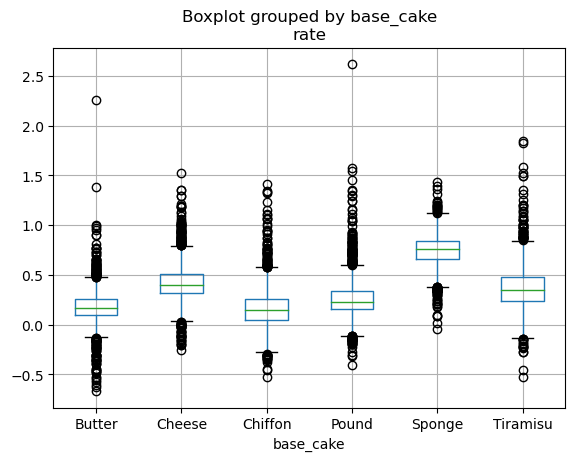

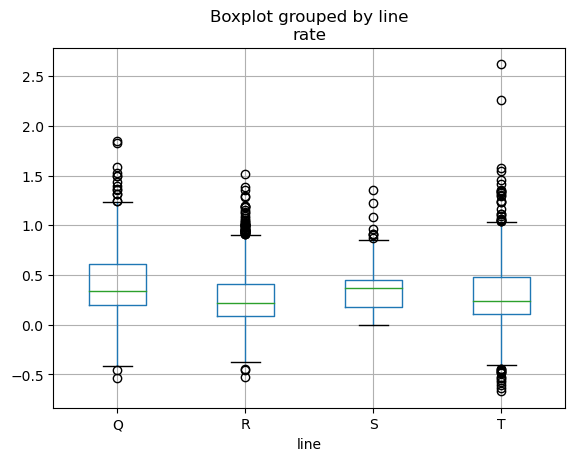

In [127]:
results.boxplot('rate', 'base_cake')
results.boxplot('rate', 'line')
plt.show()

In [129]:
results.to_csv('data/truffle_line_rates.csv', index=False)